In [1]:
# Reload the notebook automatically
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torchvision
import cv2
import numpy as np
from pathlib import Path
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import torchvision.models as models
import random
from tensorboardX import SummaryWriter
import cv2

from dataset import *
from transforms import *

In [9]:
exp = 'exp3'
epoch = 49

In [10]:
cfg = parse('/mnt/4TB/aaron/verify_hand_crop_disc/config_{}.cfg'.format(exp))

model_type = cfg['model']

if model_type == 'dcgan':
    model = DCGAN_Discriminator().cuda()

model = model.eval()

In [11]:
map_loc = 'cuda:0'
load_dir = Path(ROOT)/'verify_hand_crop_disc'/'data'/'{}'.format(exp)/'model_verify_hand_disc_{}.state'.format(epoch)
ckpt = torch.load(load_dir, map_location=map_loc)
model.load_state_dict(ckpt['model_state_dict'])


cfg['aug'] = False

dataset = FPHA_Hand_Crop_Dataset(cfg, 'test')

kwargs = {
    'batch_size'    : 1,
    'shuffle'       : cfg['shuffle'],
    'num_workers'   : int(cfg['num_workers']),
    'sampler'       : None,
    'pin_memory'    : True
}

dataloader = torch.utils.data.DataLoader(dataset, **kwargs)

# Inference

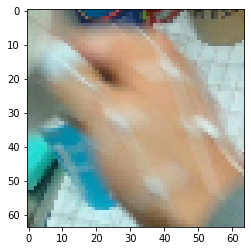

GT 1
Pred 0.9992009997367859
True Positive


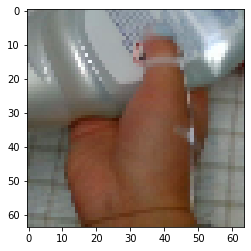

GT 1
Pred 0.9156345725059509
True Positive


GT 1
Pred 0.9904751181602478
True Positive


GT 0
Pred 0.026591960340738297
True Negative


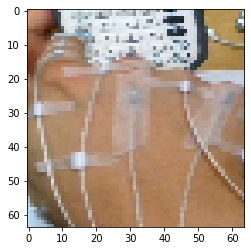

GT 1
Pred 0.6614593863487244
True Positive


GT 1
Pred 0.9877874255180359
True Positive


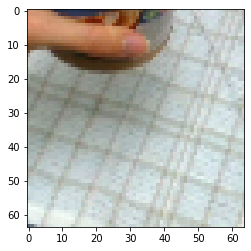

GT 0
Pred 0.021670309826731682
True Negative


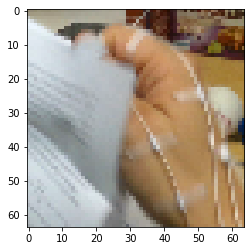

GT 1
Pred 0.9623821377754211
True Positive


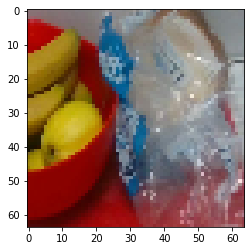

GT 0
Pred 0.0629749447107315
True Negative


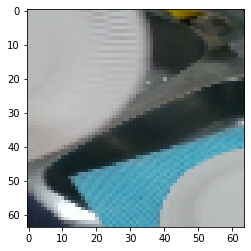

GT 0
Pred 0.0001849641848821193
True Negative


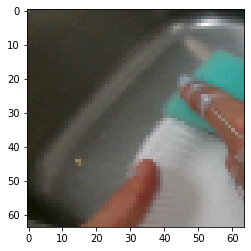

GT 0
Pred 0.001636585802771151
True Negative


GT 0
Pred 0.017234399914741516
True Negative


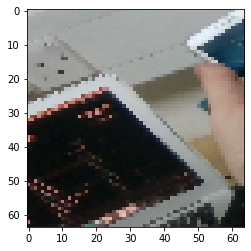

GT 0
Pred 0.004918499384075403
True Negative


GT 0
Pred 0.011752240359783173
True Negative


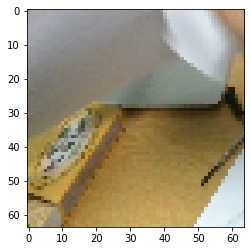

GT 0
Pred 0.008987310342490673
True Negative


GT 0
Pred 0.008041493594646454
True Negative


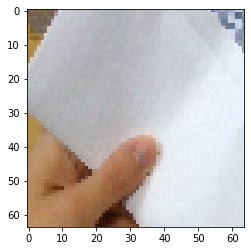

GT 0
Pred 0.0012559299357235432
True Negative


GT 0
Pred 0.007883066311478615
True Negative


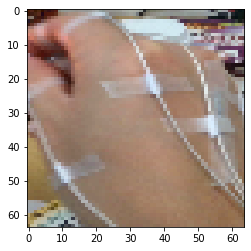

GT 1
Pred 0.9788264036178589
True Positive


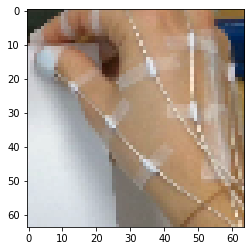

GT 1
Pred 0.9940173625946045
True Positive


GT 1
Pred 0.5277302265167236
True Positive


GT 0
Pred 0.01716449297964573
True Negative


GT 0
Pred 0.002166035119444132
True Negative


GT 0
Pred 0.009080616757273674
True Negative


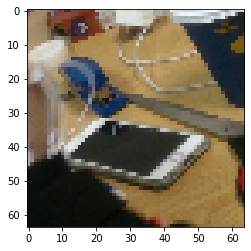

GT 0
Pred 0.022090986371040344
True Negative


GT 1
Pred 0.9981991648674011
True Positive


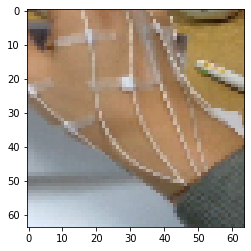

GT 0
Pred 0.5358788371086121
False Positive


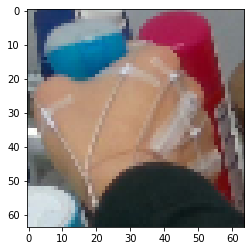

GT 1
Pred 0.9832206964492798
True Positive


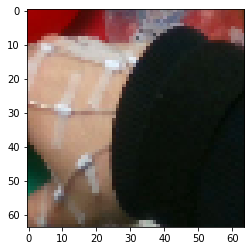

GT 1
Pred 0.3865000307559967
False Negative


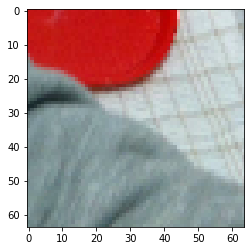

GT 0
Pred 0.005760109517723322
True Negative


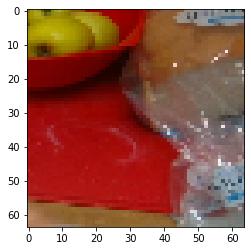

GT 0
Pred 0.02053140662610531
True Negative


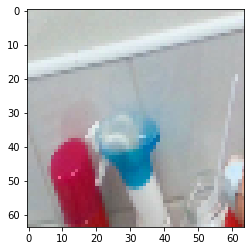

GT 0
Pred 0.006335967220366001
True Negative


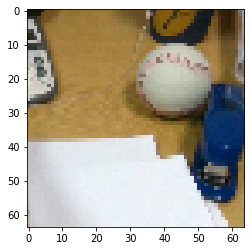

GT 0
Pred 0.032789196819067
True Negative


GT 0
Pred 0.29998308420181274
True Negative


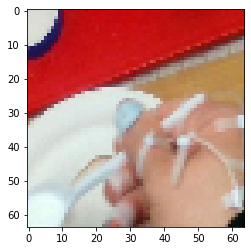

GT 0
Pred 0.040295980870723724
True Negative


GT 0
Pred 0.002655107993632555
True Negative


GT 0
Pred 0.22382472455501556
True Negative


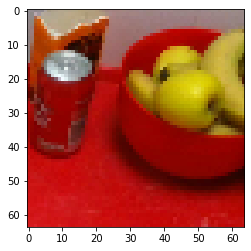

GT 0
Pred 0.008272572420537472
True Negative


GT 0
Pred 0.03547228127717972
True Negative


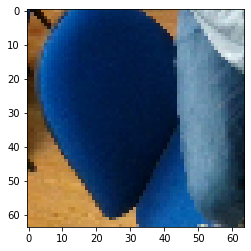

GT 0
Pred 0.017371464520692825
True Negative


GT 0
Pred 0.00213398109190166
True Negative


GT 0
Pred 0.5269724726676941
False Positive


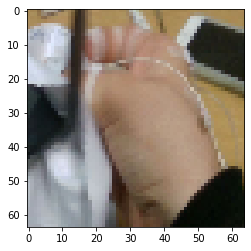

GT 1
Pred 0.9986483454704285
True Positive


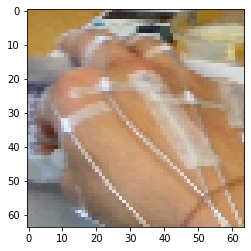

GT 1
Pred 0.9955904483795166
True Positive


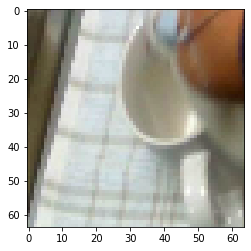

GT 0
Pred 0.05872885510325432
True Negative


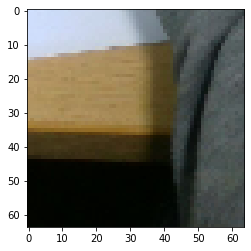

GT 0
Pred 0.13795079290866852
True Negative


GT 0
Pred 0.0066506764851510525
True Negative


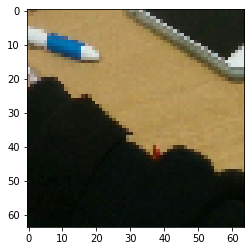

GT 0
Pred 0.05648520588874817
True Negative


GT 0
Pred 0.00011328081745887175
True Negative


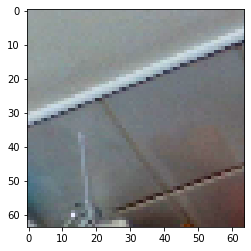

GT 0
Pred 0.01608310081064701
True Negative


In [12]:
for i in range(50):
    data_load = next(iter(dataloader))
    img_crop, is_hand = data_load
    img_crop_numpy = ImgToNumpy()(img_crop)

    idx = 0
    img = img_crop_numpy[idx].copy()
    cur_is_hand = is_hand[idx].item()

    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.show()

    img_crop_cuda = img_crop.cuda()
    out = model(img_crop_cuda)
    out = out.squeeze()

    print('GT', cur_is_hand)
    print('Pred', out.item())
    thresh = 0.5
    if out > thresh and cur_is_hand == 1:
        print('True Positive')
    elif out > thresh and cur_is_hand == 0:
        print('False Positive')
    elif out < thresh and cur_is_hand == 1:
        print('False Negative')
    elif out < thresh and cur_is_hand == 0:
        print('True Negative')

# Custom test

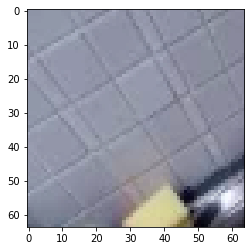

PRED: 0.0015566592337563634


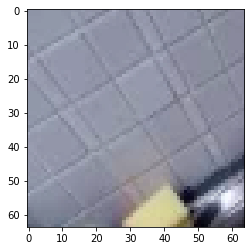

PRED: 0.0015566592337563634


PRED: 0.001814276329241693


PRED: 0.0015083122998476028


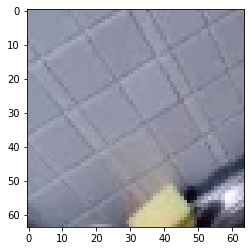

PRED: 0.0013700167182832956


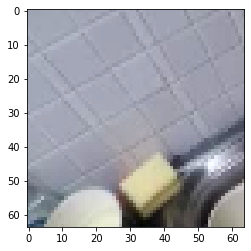

PRED: 0.0015121116302907467


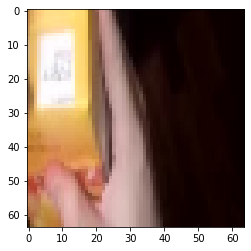

PRED: 0.6681205034255981


PRED: 0.5570626258850098


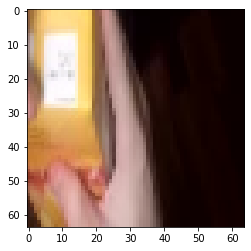

PRED: 0.6489271521568298


PRED: 0.6016446948051453


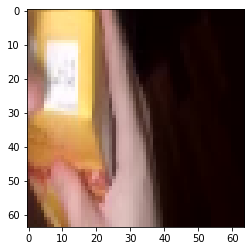

PRED: 0.6442533135414124


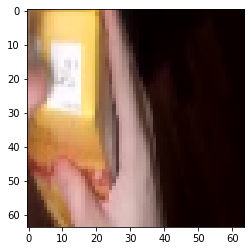

PRED: 0.6266650557518005


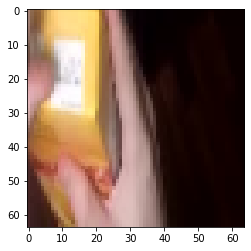

PRED: 0.7603763341903687


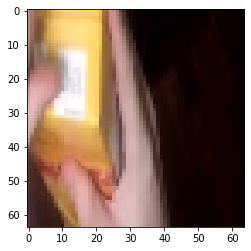

PRED: 0.7448559403419495


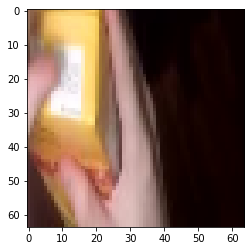

PRED: 0.764635443687439


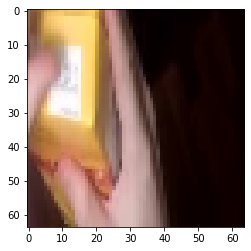

PRED: 0.7262417674064636


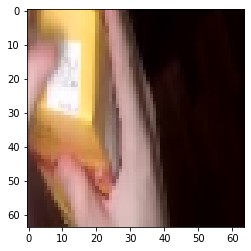

PRED: 0.7610368132591248


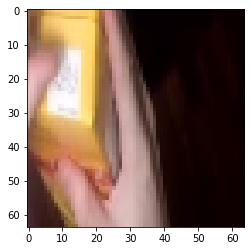

PRED: 0.6983206868171692


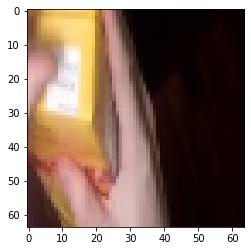

PRED: 0.719674825668335


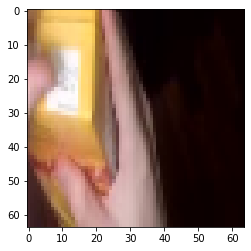

PRED: 0.6710521578788757


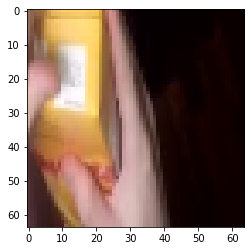

PRED: 0.7227583527565002


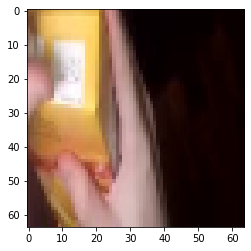

PRED: 0.7430363893508911


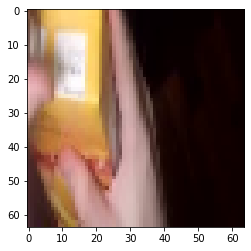

PRED: 0.8282151818275452


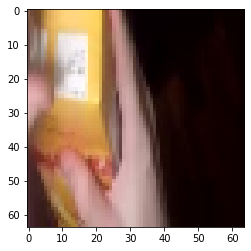

PRED: 0.8135266900062561


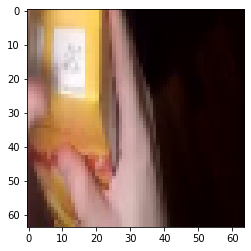

PRED: 0.8321415185928345


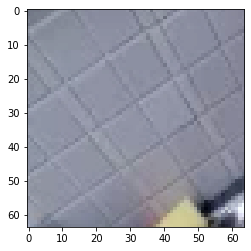

PRED: 0.0010757374111562967


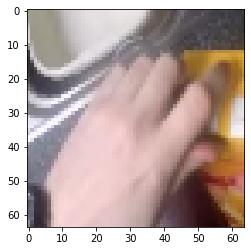

PRED: 0.34067776799201965


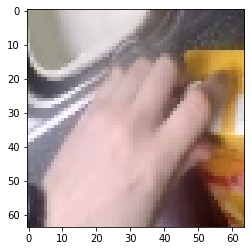

PRED: 0.17014135420322418


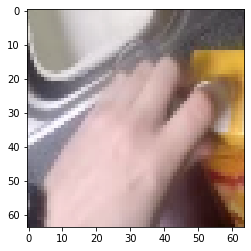

PRED: 0.16384421288967133


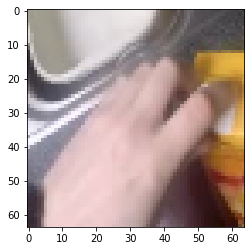

PRED: 0.17884302139282227


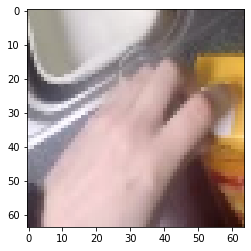

PRED: 0.17368575930595398


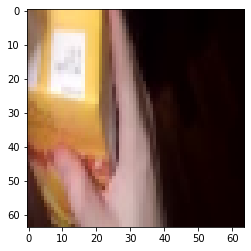

PRED: 0.6808826923370361


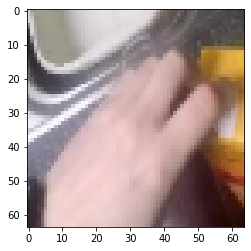

PRED: 0.3804068863391876


PRED: 0.5717443823814392


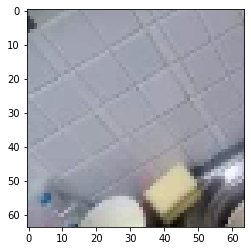

PRED: 0.002583674853667617


PRED: 0.0018748848233371973


PRED: 0.7055759429931641


PRED: 0.7346684336662292


PRED: 0.7168149948120117


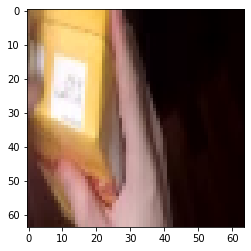

PRED: 0.6955927014350891


PRED: 0.001337620080448687


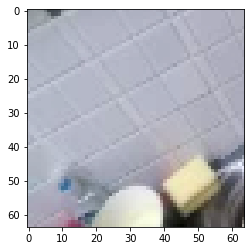

PRED: 0.0014220522716641426


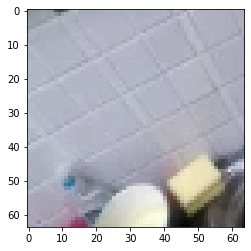

PRED: 0.0009668385609984398


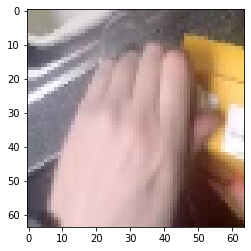

PRED: 0.6504142880439758


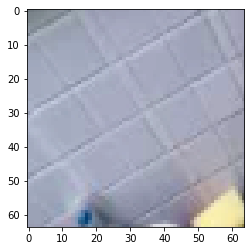

PRED: 0.0011175600811839104


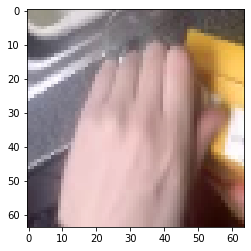

PRED: 0.6333974599838257


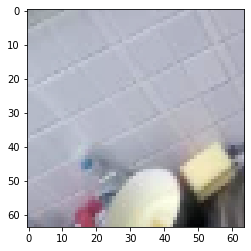

PRED: 0.0006506664794869721


PRED: 0.6742375493049622


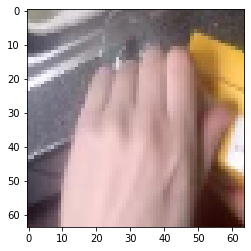

PRED: 0.6271460652351379


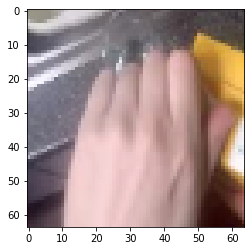

PRED: 0.7013317942619324


PRED: 0.5493236780166626


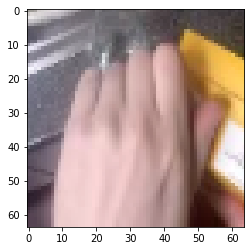

PRED: 0.7210128307342529


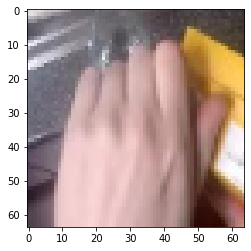

PRED: 0.7730761170387268


PRED: 0.7380867600440979


PRED: 0.5191486477851868


PRED: 0.4755370616912842


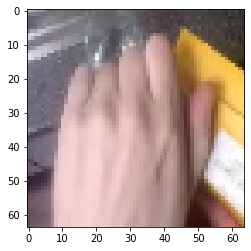

PRED: 0.694771945476532


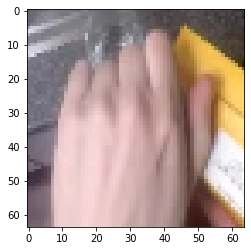

PRED: 0.6524088978767395


PRED: 0.540772557258606


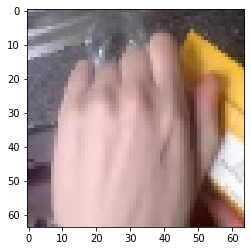

PRED: 0.49769479036331177


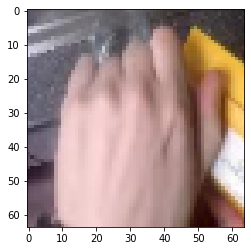

PRED: 0.609362781047821


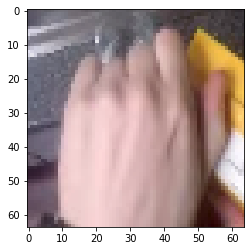

PRED: 0.7091535329818726


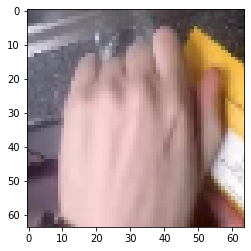

PRED: 0.6893966794013977


PRED: 0.7156046628952026


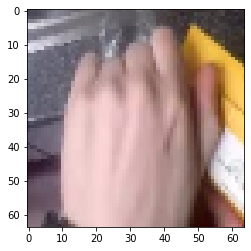

PRED: 0.7428635358810425


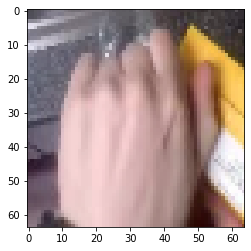

PRED: 0.7408650517463684


PRED: 0.74445641040802


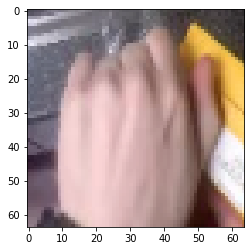

PRED: 0.7280125617980957


PRED: 0.7743613123893738


PRED: 0.8697694540023804


PRED: 0.8905563354492188


PRED: 0.9172058701515198


PRED: 0.9269237518310547


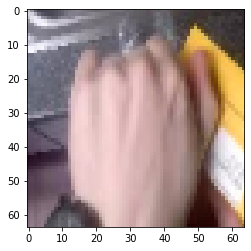

PRED: 0.9214563965797424


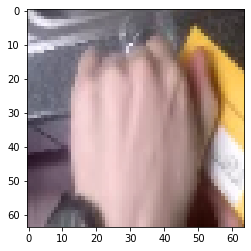

PRED: 0.9161942005157471


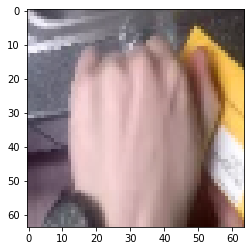

PRED: 0.9447485208511353


PRED: 0.9732999801635742


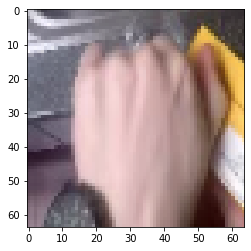

PRED: 0.9734834432601929


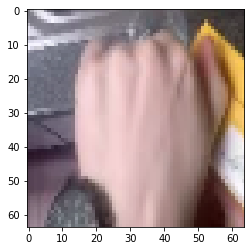

PRED: 0.9747503399848938


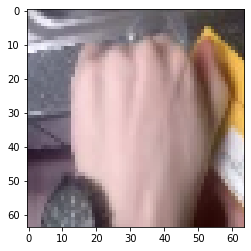

PRED: 0.9854140281677246


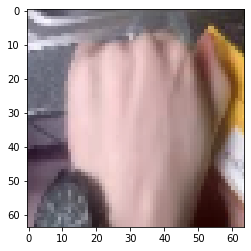

PRED: 0.9931989312171936


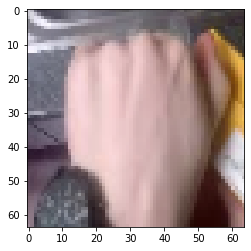

PRED: 0.9920869469642639


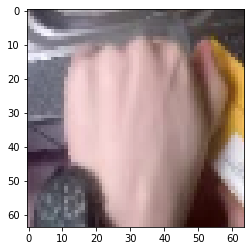

PRED: 0.9840328097343445


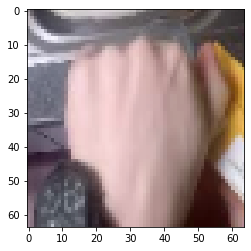

PRED: 0.9869120121002197


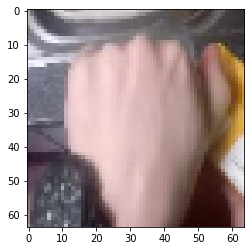

PRED: 0.9906501173973083


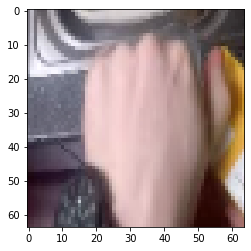

PRED: 0.9773629903793335


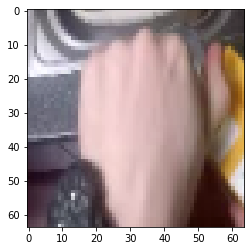

PRED: 0.9812144041061401


PRED: 0.9907709360122681


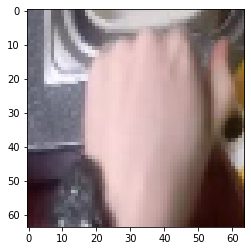

PRED: 0.9953069090843201


PRED: 0.06353067606687546


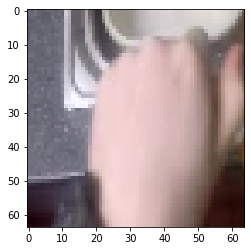

PRED: 0.9963299632072449


PRED: 0.0186440609395504


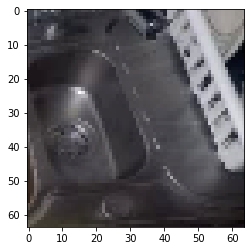

PRED: 0.013021618127822876


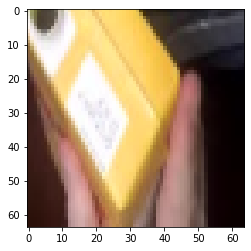

PRED: 0.9902235865592957


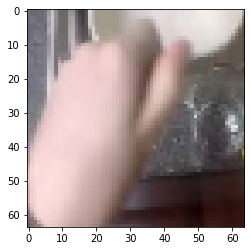

PRED: 0.6858968734741211


PRED: 0.3824506103992462


PRED: 0.384168416261673


PRED: 0.39716291427612305


PRED: 0.4345792829990387


PRED: 0.02238740772008896


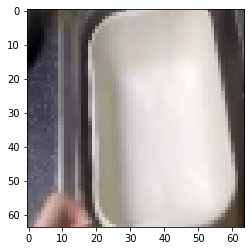

PRED: 0.5055423378944397


PRED: 0.050795506685972214


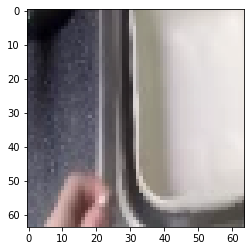

PRED: 0.06931830197572708


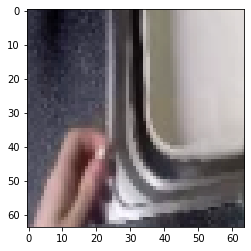

PRED: 0.014282806776463985


PRED: 0.24524244666099548


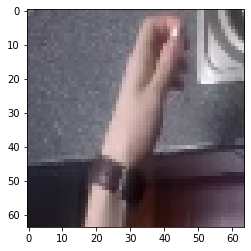

PRED: 0.2192990481853485


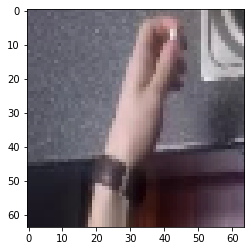

PRED: 0.20651841163635254


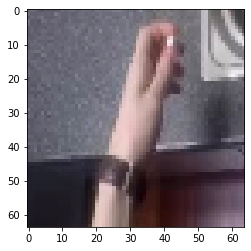

PRED: 0.25885719060897827


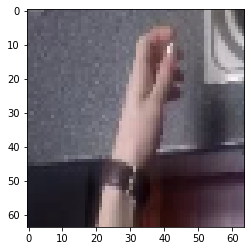

PRED: 0.17641417682170868


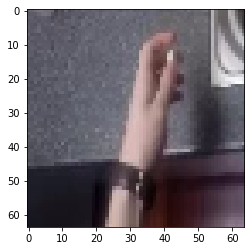

PRED: 0.09188664704561234


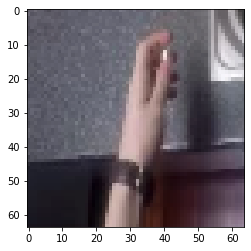

PRED: 0.12137958407402039


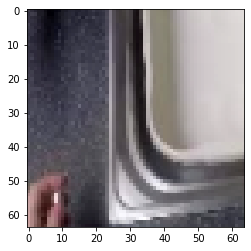

PRED: 0.005346556659787893


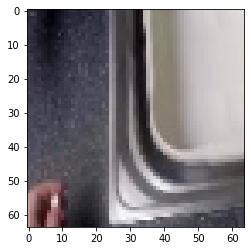

PRED: 0.006549104582518339


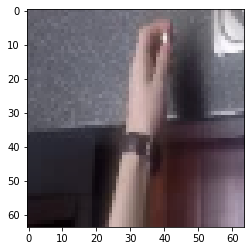

PRED: 0.03160366415977478


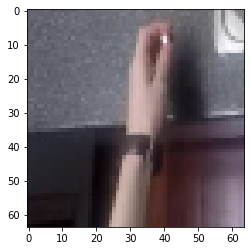

PRED: 0.03556980937719345


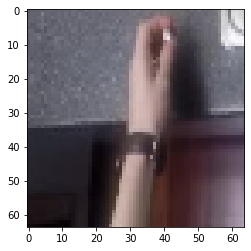

PRED: 0.04427569359540939


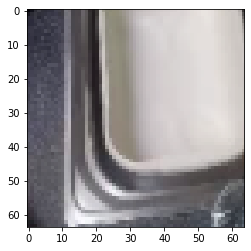

PRED: 0.11690029501914978


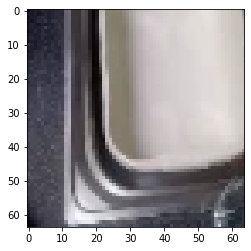

PRED: 0.10414081066846848


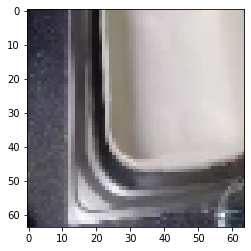

PRED: 0.12484370172023773


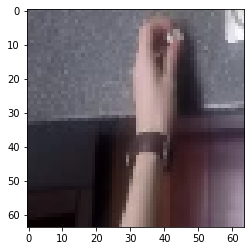

PRED: 0.056520335376262665


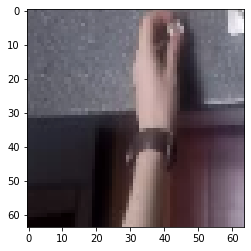

PRED: 0.06772401183843613


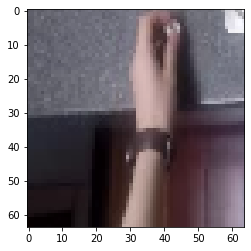

PRED: 0.0532522015273571


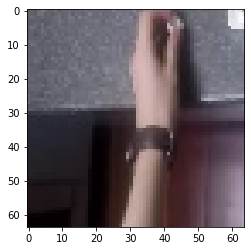

PRED: 0.08242945373058319


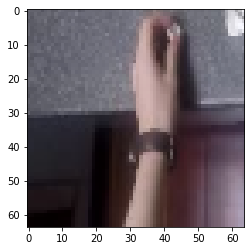

PRED: 0.07815975695848465


PRED: 0.0763571560382843


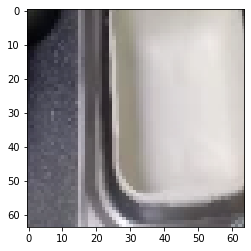

PRED: 0.07082729786634445


PRED: 0.1174357533454895


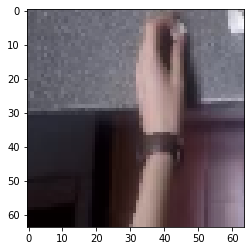

PRED: 0.1507841944694519


PRED: 0.13911794126033783


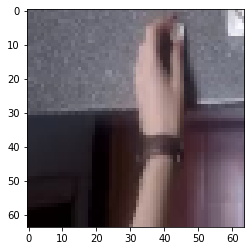

PRED: 0.13127969205379486


PRED: 0.027170686051249504


PRED: 0.09432689845561981


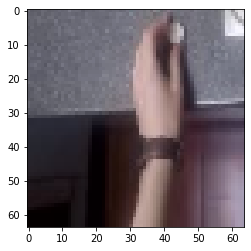

PRED: 0.11908837407827377


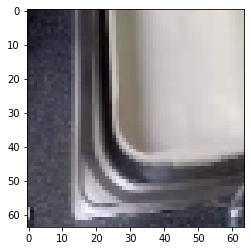

PRED: 0.028123173862695694


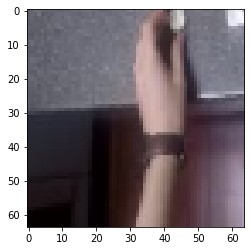

PRED: 0.14455504715442657


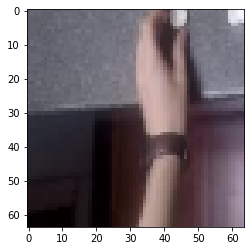

PRED: 0.21208421885967255


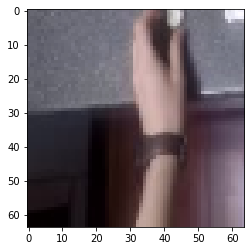

PRED: 0.3277308940887451


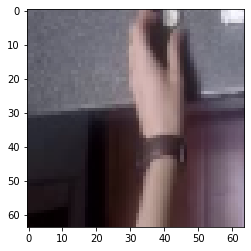

PRED: 0.389335960149765


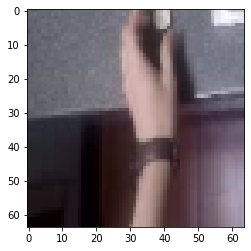

PRED: 0.3208215534687042


PRED: 0.3188139498233795


PRED: 0.4530181586742401


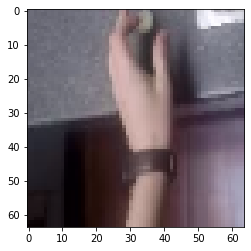

PRED: 0.2681388556957245


PRED: 0.27027323842048645


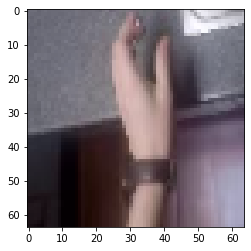

PRED: 0.18681594729423523


In [13]:
for idx in range(144):
    seq_name = 'P03_P03_10_7118_open_juice'
    img_name = 'detect_{}_fpha_hpo_hand_exp1_200_eval_{}.png'.format(seq_name, idx)
    img = cv2.imread('/mnt/4TB/aaron/mlcv-exp/data/saved/{}/{}'.format(seq_name, img_name))[:, :, ::-1]

    tfrm = []
    img_rsz = 64
    tfrm.append(ImgResize((img_rsz)))
    tfrm.append(ImgToTorch())
    transform = torchvision.transforms.Compose(tfrm)

    sample          = {'img': img}
    sample          = transform(sample)
    sample_img      = sample['img'].unsqueeze(0)
    img_numpy = ImgToNumpy()(sample_img)[0]

    fig, ax = plt.subplots()
    ax.imshow(img_numpy)
    plt.show()

    img_cuda = sample_img.cuda()
    out = model(img_cuda)
    out = out.squeeze()
    print('PRED:', out.item())